

<center><h3>Investigating Local University Education in relation to demands of the Various Industries' Manpower Needs in Singapore</h3></center>
<hr>

## Author(s)

- Chen Jie (@chenjie)

- Lim En Lye Perrie (@perrielim)

- Ong Chian Wee (@ongchianwee)

- Tan Wei Hao Jonathan (@ilovecebu)

- Weng Lu Yao (@luyaoo)

Class 19 Jul Sun 3.45pm 

## Research Topic

When choosing to pursue a university education, it is intuitive to be drawn to figures like univeristy rankings to gauge the prestige of such instuitions. However, such indexes tend to place emphasis on global significance on research publications as opposed to something that the modern Singaporean student is most concern about, relevance to the job market. With some news coverage on initiatives by universities to support the demands of various rising industries, it begs the question to what extent are resources truly meeting these job demands. Thus, our group aims to look at the available information from the government database, to anticipate what are the rising industries and investigate if these needs are being met. 


<b>Problem Statement: </b>  Is Singapore's university education meeting the demands of the manpower needs in various indusries? Answered in <b>Three Parts</b>.

<b>(A)</b> What are the industries rising in manpower demand?

<b>(B)</b> Does the employment rates for the various university courses correspond with this demand?

<b>(C)</b> Does the government funding or university intake reflect these trends?




<hr>

**Articles used:**
- Article 1 (https://www.channelnewsasia.com/news/singapore/commentary-the-relentless-pursuit-of-university-rankings-is-9314918) retrieved on 13 Aug 2020
- Article 2 (https://news.nus.edu.sg/sites/default/files/resources/news/2018/2018-03/2018-03-01/COMPUTING-st-1mar-pB1-B2.pdf) retrieved on 13 Aug 2020

**Datasets used:**

<b>(A) What are the industries rising in manpower demand? </b>
-  Average monthly recruitment/resignation https://data.gov.sg/dataset/average-monthly-recruitment-resignation-rates-by-industry-and-occupational-group-quarterly retrieved on 18 Aug 2020
- Job Vacancy Rate by Industry https://data.gov.sg/dataset/job-vacancy-rates-by-industry-and-occupational-group-quarterly retrieved on 18 Aug 2020


<b>(B) Does the employment rates for the various University courses correspond with this demand? </b>
- Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD (https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd) retrieved on 13 Aug 2020


<b>(C) Does the Government funding or University intake reflect these trends? </b> 
- Gov Expenditure on Education https://data.gov.sg/dataset/government-recurrent-expenditure-on-education retrieved on 18 Aug 2020
- University Intake by Course https://data.gov.sg/dataset/universities-intake-enrolment-and-graduates-by-course retrieved on 18 Aug 2020


## Methodology 

To find out whether the manpower needs are met by the local universities, the three parts are answered by their respective methodology.

- As the GES dataset was limited to a period of 2013- 2018, we standardised that all data sets are analysed within that period.
- In the data sets for recruitment and job vacancy, there are levels of industries, whereby each level is more specific than the previous one. 
       - Ie. Level 1: Industry, Level 2: Sectors within Industry, Level 3: Jobs within Sector

<b>(A) What are the industries rising in manpower demand?</b> 

1. Analyse across the different industries (Level 1)

    - Find the mean recruitment rate and job vacancy rate across categories of industry per year    
    - Plot the trend of mean recruitment rate and job vacancy rate per year. 
    - Identify the industry rising in manpower demand
    

2. From the industry identified as rising highest in manpower demand, analyse the specific sectors within the industry (Level 2)

   - Plot the trend of mean recruitment rate and job vacancy rate per year.
   - Identify an sector rising in manpower demand
    

3. From the sector identified as rising highest in manpower demand, analyse the specific jobs within the sector (Level 3)

   - Plot the trend of mean recruitment rate and job vacancy rate per year. 
   - Identify jobs rising in manpower demand
   - Generate regression model to predict projected job vacancy


<b>(B) Does the employment rate for the various university courses correspond with this demand?</b>

1.	With the identified sector that is rising highest in manpower demand, find the related university courses.
2.	Find the mean employment rate within each sector-related course per year
3.	For each of the sector-related courses, plot the trend of employment rate across the period 2013 – 2018.  
4.	Identify if all sector-related courses are rising in employment rate

<b>(C) Does the government funding or university intake reflect these trends? </b>
1. Government Funding
    - Plot the government expenditure on universities across the period 2013 – 2018. 
2. University Intake
    - With the identified sector that is rising highest in manpower demand, find the related university course(s).
    - Plot the yearly mean intake for the course(s) 
    
Finally, we find out whether a rise in manpower demand of a certain sector is matched by that of local universities, be it in terms of employment of relevant graduates, higher intake to the relevant courses or more resources invested into the universities.




<b> Importing the relevant libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error 
from sklearn import linear_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

### (A) What are the industries rising in manpower demand

#### Data Cleaning

Clean data to investigate only in the period between 2013-2018

In [3]:
Vacancy_L1 = pd.read_csv('job-vacancy-rate-by-industry-level1.csv')
Vacancy_L2 = pd.read_csv('job-vacancy-rate-by-industry-level2.csv')
Vacancy_L3 = pd.read_csv('job-vacancy-rate-by-industry-level3.csv')
Recruitment_Resignation_L1 = pd.read_csv('average-monthly-recruitment-resignation-rate-by-industry-level1.csv')
Recruitment_Resignation_L2 = pd.read_csv('average-monthly-recruitment-resignation-rate-by-industry-level-2.csv')
Recruitment_Resignation_L3 = pd.read_csv('average-monthly-recruitment-resignation-rate-by-industry-level-3.csv')

In [4]:
def filter_data(df):
    df.drop(df[df['quarter'] < '2013'].index, inplace=True)
    df.drop(df[df['quarter'] > '2019'].index, inplace=True)
    
filter_data(Recruitment_Resignation_L1)
filter_data(Vacancy_L1)
filter_data(Recruitment_Resignation_L2)
filter_data(Vacancy_L2)
filter_data(Recruitment_Resignation_L3)
filter_data(Vacancy_L3)

Merge recruitment rate, resignation rate and job vacancy rate into single data frame.

In [5]:
all_L1_df = Recruitment_Resignation_L1.merge(Vacancy_L1)
all_L2_df = Recruitment_Resignation_L2.merge(Vacancy_L2)
all_L3_df = Recruitment_Resignation_L3.merge(Vacancy_L3)

#### Analyse across the different industries (Level 1)

Find the mean recruitment rate and job vacancy rate across categories of industry per year

In [6]:
all_L1_df.groupby('industry1').mean()

,recruitment_rate,resignation_rate,job_vacancy_rate
industry1,,,
construction,2.362500,1.812500,0.958333
manufacturing,1.745833,1.508333,1.912500
others,1.733333,1.412500,2.258333
services,2.575000,2.012500,3.241667


Plot the trend of mean recruitment rate and job vacancy rate per year
- In a first subplot, plot the trend of mean recruitment rate per year for the various industry categories.
- In a second subplot, plot the trend of mean job vacancy rate per year for the various industry categories.

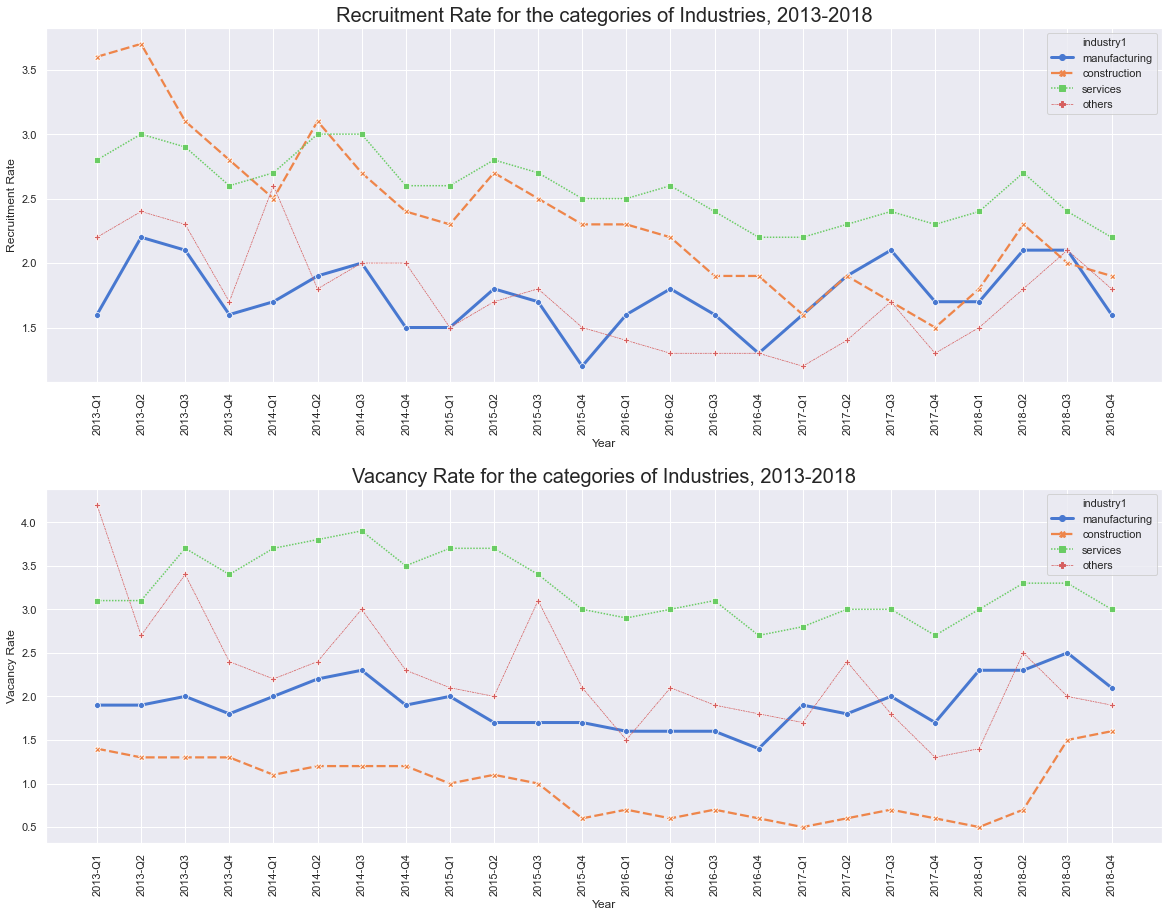

In [32]:
# Create the figure
fig_dimensions=(20, 15)
fig = plt.figure(figsize = fig_dimensions)

# Add First subplot
ax1 = fig.add_subplot(2,1,1)
sns.set(style="darkgrid")
ax1 = sns.lineplot(data = all_L1_df, x='quarter', y='recruitment_rate', hue='industry1', style='industry1', size = 'industry1', palette="muted", markers=True, dashes=True)
ax1.set_title("Recruitment Rate for the categories of Industries, 2013-2018", fontsize=20)
ax1.set_ylabel("Recruitment Rate",fontsize=12)
ax1.set_xlabel("Year",fontsize=12)
plt.xticks(rotation=90)

# Add second subplot
ax1 = fig.add_subplot(2,1,2)
sns.set(style="darkgrid")
ax1 = sns.lineplot(data = all_L1_df, x='quarter', y='job_vacancy_rate', hue='industry1', style='industry1', size = 'industry1', palette="muted", markers=True, dashes=True)
ax1.set_title("Vacancy Rate for the categories of Industries, 2013-2018", fontsize=20)
ax1.set_ylabel("Vacancy Rate",fontsize=12)
ax1.set_xlabel("Year",fontsize=12)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.3)
plt.show()

From the graphs above, "services" industry has the highest recruitment rate and job vacancy rate. These suggests there is a high demand for labour in this sector. Hence, our group will be focusing on the <b>"services" industry</b> by looking at the breakdown of the categories under the it.

#### From the industry identified as rising highest in manpower demand, analyse the specific sectors within the industry (Level 2)

Find out the sectors within <b>"services"</b> industry

In [8]:
services = all_L2_df['industry1'] == 'services'
all_L2_services_df = all_L2_df[services]
all_L2_services_df['industry2'].unique()

array(['wholesale and retail trade', 'transportation and storage',
       'accommodation and food services',
       'information and communications',
       'financial and insurance services', 'real estate services',
       'professional services', 'administrative and support services',
       'community, social and personal services'], dtype=object)

Plot the trend of mean recruitment rate and job vacancy rate per year. 
- In a single subplot, plot the trend of mean recruitment rate per year for the various sectors.
- In a single subplot, plot the trend of mean job vacancy rate per year for the various sectors.

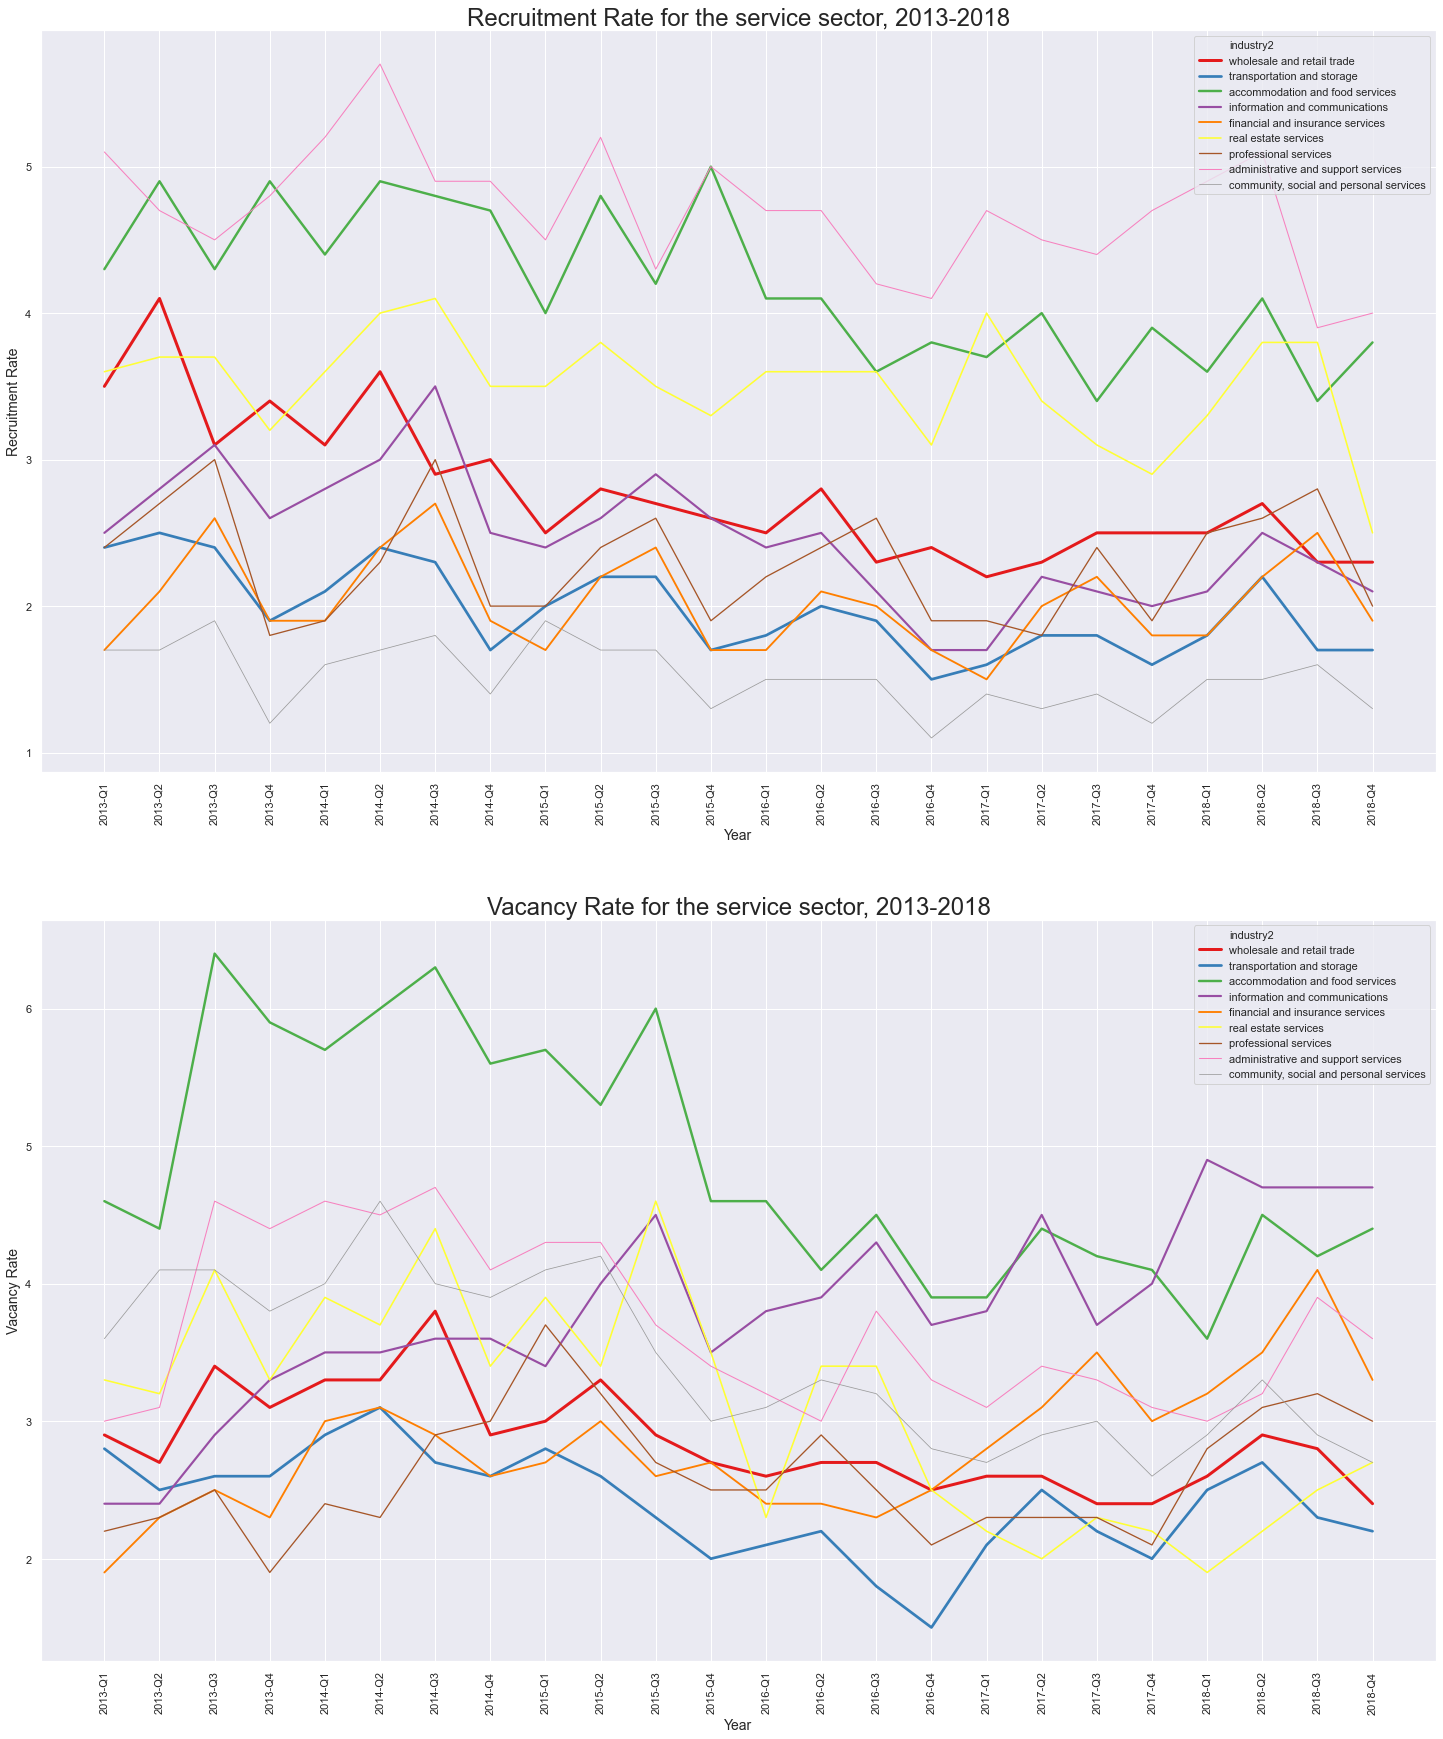

In [33]:
# Create the figure
fig_dimensions=(25, 30)
fig = plt.figure(figsize = fig_dimensions)

# Add First subplot
ax1 = fig.add_subplot(2,1,1)
sns.set(style="darkgrid")
ax1 = sns.lineplot(data = all_L2_services_df, x='quarter', y='recruitment_rate', hue='industry2', size='industry2', palette="Set1", markers=True, dashes=True)
ax1.set_title("Recruitment Rate for the service sector, 2013-2018", fontsize=24)
ax1.set_ylabel("Recruitment Rate",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
plt.xticks(rotation=90)

# Add second subplot
ax1 = fig.add_subplot(2,1,2)
sns.set(style="darkgrid")
ax1 = sns.lineplot(data = all_L2_services_df, x='quarter', y='job_vacancy_rate', hue='industry2', size = 'industry2', palette="Set1", markers=True, dashes=True)
ax1.set_title("Vacancy Rate for the service sector, 2013-2018", fontsize=24)
ax1.set_ylabel("Vacancy Rate",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.2)
plt.show()

From the graphs above, there were no insightful result we can get from recruitment rate. Whereas from the job vacancy graph, the general trend for most of the industry rate is decreasing but this is not the case for <b>"information and communication"</b>. Therefore, we further looked into the "information and communication" sector.

#### From the sector identified as rising highest in manpower demand, analyse the specific jobs within the sector (Level 3)

Find out the jobs within <b>"information and communication"</b> industry

In [10]:
it_services = all_L3_df['industry2'] == 'information and communications'
all_L3_services_df = all_L3_df[it_services]
all_L3_services_df['industry3'].unique()

array(['telecommunications, broadcasting and publishing',
       'it and other information services'], dtype=object)

Plot the trend of mean recruitment rate and job vacancy rate per year.
- In a first subplot, plot the trend of mean recruitment rate per year for the various jobs.
- In a second subplot, plot the trend of mean job vacancy rate per year for the various jobs.


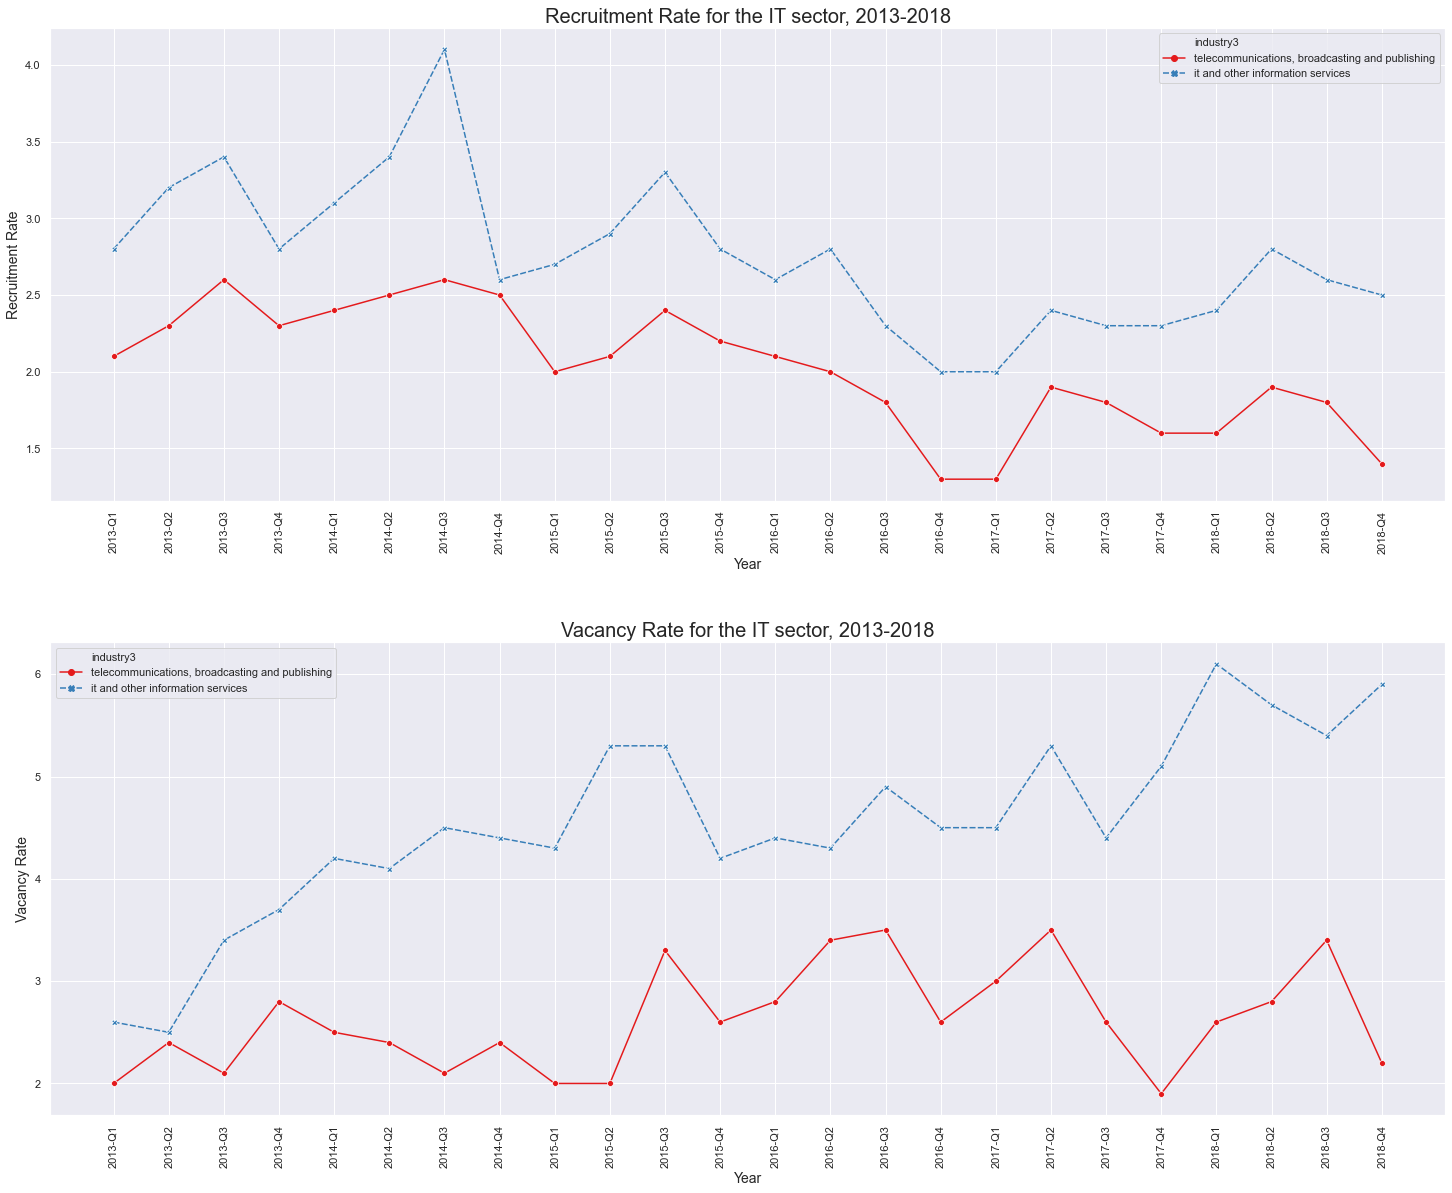

In [11]:
# Create the figure
fig_dimensions=(25, 20)
fig = plt.figure(figsize = fig_dimensions)

# Add First subplot
ax1 = fig.add_subplot(2,1,1)
sns.set(style="darkgrid")
ax1 = sns.lineplot(data = all_L3_services_df, x='quarter', y='recruitment_rate', style = 'industry3', hue='industry3', palette="Set1", markers=True, dashes=True)
ax1.set_title("Recruitment Rate for the IT sector, 2013-2018", fontsize=20)
ax1.set_ylabel("Recruitment Rate",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
plt.xticks(rotation=90)

# Add second subplot
ax1 = fig.add_subplot(2,1,2)
sns.set(style="darkgrid")
ax1 = sns.lineplot(data = all_L3_services_df, x='quarter', y='job_vacancy_rate',style = 'industry3', hue='industry3', palette="Set1", markers=True, dashes=True)
ax1.set_title("Vacancy Rate for the IT sector, 2013-2018", fontsize=20)
ax1.set_ylabel("Vacancy Rate",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.3)
plt.show()

From the graphs above, we can observe a rising manpower demand for the <b>"IT and other services"</b> sector.

#### Regression Model

Transform the <b>"quarters"</b> columns to float type in order to plot the regression model

In [12]:
def transform_quarters(row):
    if row[6] == '1':
        a = float(row[:4]+'.00')   
    elif row[6] == '2':
        a = float(row[:4]+'.25')    
    elif row[6] == '3':
        a = float(row[:4]+'.50')  
    elif row[6] == '4':
        a = float(row[:4]+'.75')
    return a

In [13]:
cond = all_L3_services_df['industry3'] == 'it and other information services'
infocomm_df = all_L3_services_df[cond]
infocomm_df['quarter'] = infocomm_df['quarter'].apply(transform_quarters)
infocomm_df.head()

,quarter,industry1,industry2,industry3,recruitment_rate,resignation_rate,job_vacancy_rate
17,2013.00,services,information and communications,it and other information services,2.8,2.1,2.6
49,2013.25,services,information and communications,it and other information services,3.2,2.5,2.5
81,2013.50,services,information and communications,it and other information services,3.4,2.4,3.4
113,2013.75,services,information and communications,it and other information services,2.8,1.9,3.7
145,2014.00,services,information and communications,it and other information services,3.1,2.0,4.2


Using the .corr(), we found that job_vacancy_rate has the highest correlation as compared to the two other features. Hence, the job_vacancy_rate will be used to build the regression model 

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
infocomm_df.select_dtypes(include = numerics)

infocomm_numeric_df_corr = infocomm_df.corr()

infocomm_numeric_df_corr.style.background_gradient(cmap = 'coolwarm')

,quarter,recruitment_rate,resignation_rate,job_vacancy_rate
quarter,1.000000,-0.617636,-0.621929,0.827022
recruitment_rate,-0.617636,1.000000,0.609768,-0.315512
resignation_rate,-0.621929,0.609768,1.000000,-0.592505
job_vacancy_rate,0.827022,-0.315512,-0.592505,1.000000


#### Building Regression Model

In [15]:
# Using sm.OSL to perform Linear Regression
model = sm.OLS(infocomm_df[['job_vacancy_rate']],infocomm_df[['quarter']])
results = model.fit()

#### Assess Perfomance of Model

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       job_vacancy_rate   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              601.3
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                    5.45e-18
Time:                        23:35:40   Log-Likelihood:                         -31.214
No. Observations:                  24   AIC:                                      64.43
Df Residuals:                      23   BIC:                                      65.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quarter        0.0023   9.19e-05     24.522      0.000       0.002       0.002
==============================================================================
Omnibus:                        1.688   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                0.920
Skew:                          -0.478   Prob(JB):                        0.631
Kurtosis:                       3.077   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, you can see that the correlation coefficient is positive.

R-squared (Coefficient of Determination):
- Measures the strength of the relationship between the model and the dependent variable. Falls between 0 and 1.
- R-squared is 0.964 which is high. It indicates smaller differences between the observed/raw data and the fitted values.
- This analysis is indicative of the a rising demand for Infocomm manpower due to an increase in vacancy of in the Infocomm sector.

The high r-squared value of 0.963 suggest the predicted regression model fits the data well.

### (B) Does the employment rate for the various university courses correspond with this demand?

#### Data Cleaning

Find the sector-related university courses - computing, business, computer, infomation

In [17]:
df_grad_survey = pd.read_csv("graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv", encoding='latin1')

df_grad_survey_new = df_grad_survey[["year", "university", "degree", "employment_rate_overall", "employment_rate_ft_perm"]]
df_grad_survey_new.set_index('degree', inplace=True)

df_computing = df_grad_survey_new.filter(regex='Computing', axis=0)
df_business = df_grad_survey_new.filter(regex='Business', axis=0)
df_CS = df_grad_survey_new.filter(regex='Computer', axis=0)
df_info = df_grad_survey_new.filter(regex='Information', axis=0)

Replace 'na' values with 0

In [18]:
df_computing['employment_rate_overall'] = df_computing['employment_rate_overall'].replace(to_replace='na', value=0)
df_business['employment_rate_overall'] = df_business['employment_rate_overall'].replace(to_replace='na', value=0)
df_CS['employment_rate_overall']=df_CS['employment_rate_overall'].replace(to_replace='na', value=0)
df_info['employment_rate_overall'] = df_info['employment_rate_overall'].replace(to_replace='na', value=0)

Change overall employment rate from string to numeric

#### With the identified sector that is rising highest in manpower demand, analyse the related university courses.

In [19]:
df_computing['employment_rate_overall'] = pd.to_numeric(df_computing['employment_rate_overall'],errors='coerce')
df_business['employment_rate_overall'] = pd.to_numeric(df_business['employment_rate_overall'],errors='coerce')
df_CS['employment_rate_overall'] = pd.to_numeric(df_CS['employment_rate_overall'],errors='coerce')
df_info['employment_rate_overall'] = pd.to_numeric(df_info['employment_rate_overall'],errors='coerce')

Find the mean employment rate within each sector-related course per year (Note: values with '0' were left out in calculation of mean so as not to skew the values)

In [20]:
# computing
cond_not_0_computing = df_computing['employment_rate_overall'] != 0

df_computing = df_computing[cond_not_0_computing]
df_computing = df_computing.groupby('year')['employment_rate_overall'].mean()

# info
cond_not_0_info = df_info['employment_rate_overall'] != 0

df_info = df_info[cond_not_0_info]
df_info = df_info.groupby('year')['employment_rate_overall'].mean()

# CS
cond_not_0_CS = df_CS['employment_rate_overall'] != 0

df_CS = df_CS[cond_not_0_CS]
df_CS = df_CS.groupby('year')['employment_rate_overall'].mean()

# business
cond_not_0_business = df_business['employment_rate_overall'] != 0

df_business = df_business[cond_not_0_business]
df_business = df_business.groupby('year')['employment_rate_overall'].mean()


For each of the sector-related courses, plot the trend of employment rate across the period 2013 – 2018.

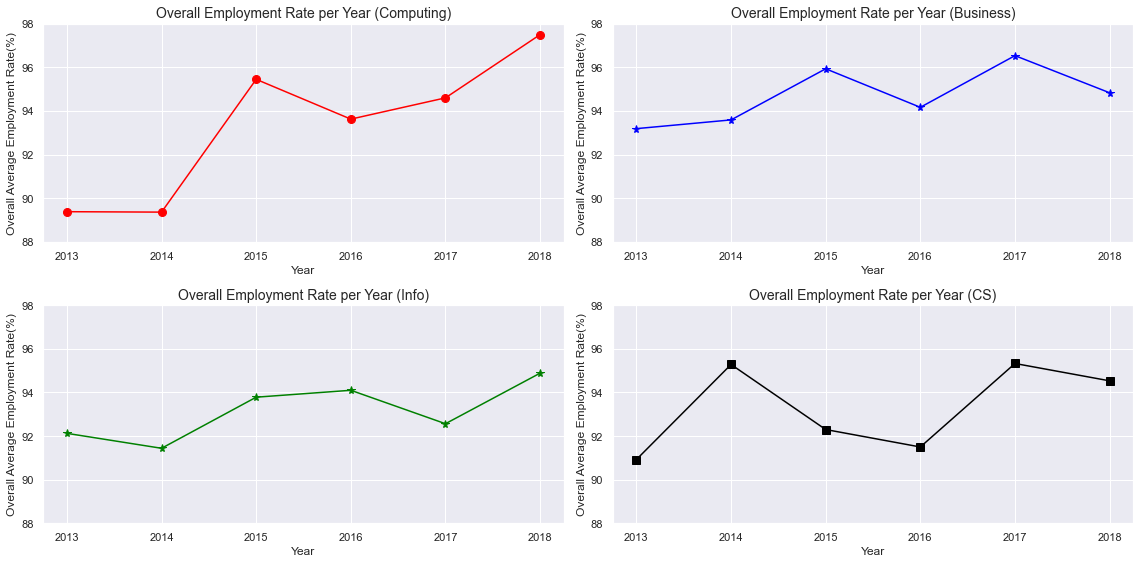

In [21]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#computing

df_computing.plot(kind = 'line', ax = ax1, color='red', marker = 'o', markersize=8)
ax1.set_yticks(np.arange(88, 100, 2))
ax1.set_ylabel('Overall Average Employment Rate(%)')
ax1.set_xlabel('Year')
ax1.set_title('Overall Employment Rate per Year (Computing)', fontsize = 14)

# business

df_business.plot(kind = 'line', ax = ax2, color='blue', marker = '*', markersize=8)
ax2.set_yticks(np.arange(88, 100, 2)) # what does this do? Look up the documentation
ax2.set_title('Overall Employment Rate per Year (Business)', fontsize = 14)
ax2.set_ylabel('Overall Average Employment Rate(%)')
ax2.set_xlabel('Year')

#info

df_info.plot(kind = 'line', ax = ax3, color='green', marker = '*', markersize=8)
ax3.set_yticks(np.arange(88, 100, 2)) # what does this do? Look up the documentation
ax3.set_title('Overall Employment Rate per Year (Info)', fontsize = 14)
ax3.set_ylabel('Overall Average Employment Rate(%)')
ax3.set_xlabel('Year')

#CS

df_CS.plot(kind = 'line', ax = ax4, color='black', marker = 's', markersize=8)
ax4.set_yticks(np.arange(88, 100, 2)) # what does this do? Look up the documentation
ax4.set_title('Overall Employment Rate per Year (CS)', fontsize = 14)
ax4.set_ylabel('Overall Average Employment Rate(%)')
ax4.set_xlabel('Year')


fig.tight_layout()

From the data above, the courses related to 'IT and other information services' all show an upward trend in employment rate. Hence, from 2013 to 2018, as the vacancy rate in the 'IT and other information services' increases, the employment rate of university graduates with relevant courses increases.

### (C) Does the government funding or university intake reflect these trends?

#### Data Cleaning: Government Spending Data
- Set recurrent expenditure as numeric
- Reduce to years from 2013-2018 
- Only University as educational institution

In [22]:
govt_spending = pd.read_csv('government-recurrent-expenditure-on-education-by-type-of-educational-institutions.csv')
govt_spending['recurrent_expenditure'] = pd.to_numeric(govt_spending['recurrent_expenditure'])
govt_spending = govt_spending.drop(govt_spending[govt_spending['year']<2013].index)
govt_spending = govt_spending.drop(govt_spending[govt_spending['type_of_educational_institutions']!='Universities'].index)

Plot the government expenditure on universities across the period 2013 – 2018

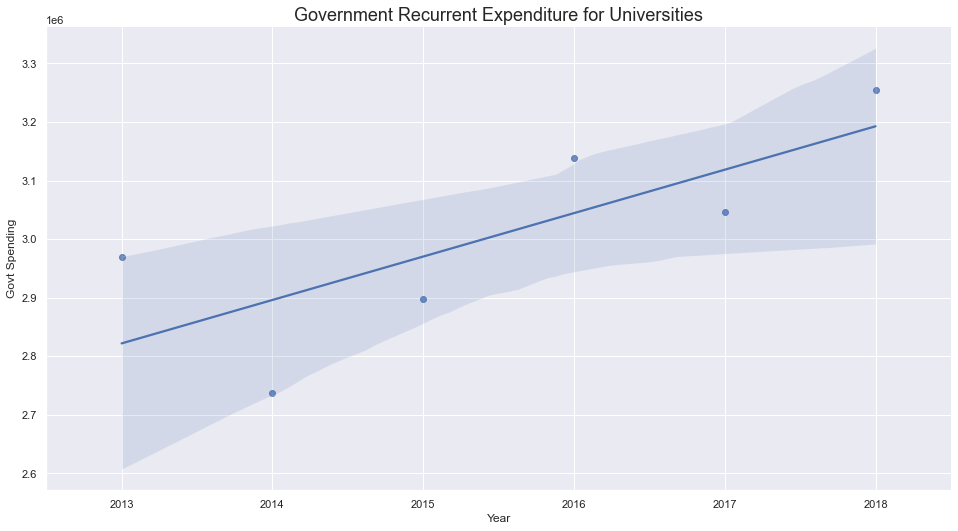

In [23]:
ax = sns.lmplot(x='year',y='recurrent_expenditure',data=govt_spending,fit_reg=True) 
ax.fig.set_size_inches(16,8)
ax.set(xlim = (2012.5,2018.5))
plt.xlabel('Year')
plt.ylabel('Govt Spending')
plt.title('Government Recurrent Expenditure for Universities', fontsize=18)
plt.show()

Although we can observe an increase in the government expenditure for universities, we cannot be certain this immediately translates to more resources in the direction of the manpower demands. One possiblity could be catering more funding for specific courses and we can check this by investigating whether there are more resources to allow for a larger intake in certain courses.

#### Data Cleaning: University Intake Data
- Set university intake as numeric
- Reduce to years from 2013-2018 
- Removal of 2016 and 2018 NaN data
- Individual data frames for course of interest

In [24]:
df_uni_intake = pd.read_csv("universities-intake-enrolment-and-graduates-by-course.csv")
df_uni_intake["intake"] = pd.to_numeric(df_uni_intake["intake"],errors='coerce')
df_uni_intake.dtypes

year           int64
sex           object
course        object
intake       float64
enrolment     object
graduates     object
dtype: object

In [25]:
years = [2013,2014,2015,2016,2017,2018]
for year in years:
    cond1 = df_uni_intake['year'] == year
    print("Year=", year, "", df_uni_intake[cond1].isnull().sum())

Year= 2013  year         0
sex          0
course       0
intake       0
enrolment    0
graduates    0
dtype: int64
Year= 2014  year         0
sex          0
course       0
intake       0
enrolment    0
graduates    0
dtype: int64
Year= 2015  year         0
sex          0
course       0
intake       0
enrolment    0
graduates    0
dtype: int64
Year= 2016  year         0
sex          0
course       0
intake       5
enrolment    0
graduates    0
dtype: int64
Year= 2017  year         0
sex          0
course       0
intake       0
enrolment    0
graduates    0
dtype: int64
Year= 2018  year          0
sex           0
course        0
intake       10
enrolment     0
graduates     0
dtype: int64


#### Explanation 
- Inspecting the missing data by year we can see that 2016 and 2018 has several NaN data. This warrants further inspection.

In [26]:
df_uni_intake[df_uni_intake['year'] == 2018]

,year,sex,course,intake,enrolment,graduates
390,2018,MF,Accountancy,NaN,"5,219","1,299"
391,2018,F,Accountancy,731.0,"2,898",720
392,2018,MF,"Architecture, Building & Real Estate",458.0,"1,993",517
393,2018,F,"Architecture, Building & Real Estate",280.0,"1,190",343
394,2018,MF,Business & Administration,NaN,"9,018","1,884"
395,2018,F,Business & Administration,NaN,"5,277","1,047"
396,2018,MF,Dentistry,60.0,224,53
397,2018,F,Dentistry,33.0,135,39
398,2018,MF,Education,220.0,549,283
399,2018,F,Education,185.0,449,226


In [27]:
df_uni_intake[df_uni_intake['year'] == 2016]

,year,sex,course,intake,enrolment,graduates
330,2016,MF,Accountancy,NaN,5090,1103
331,2016,F,Accountancy,912.0,2909,664
332,2016,MF,"Architecture, Building & Real Estate",419.0,1980,459
333,2016,F,"Architecture, Building & Real Estate",252.0,1205,274
334,2016,MF,Business & Administration,NaN,7514,1720
335,2016,F,Business & Administration,1237.0,4230,969
336,2016,MF,Dentistry,54.0,220,53
337,2016,F,Dentistry,39.0,145,28
338,2016,MF,Education,217.0,743,406
339,2016,F,Education,172.0,577,327


#### Rationale for removal of 2016 and 2018 data
- We see a large number of NaN data in either MF or F dataset for courses we are interested in drastically reducing the total number of intake. This could misrepresent the trends of the intake (sudden drops). Thus, we will be removing both 2016 and 2018 data

In [28]:
df_uni_intake.drop(df_uni_intake[df_uni_intake["year"] < 2013].index, inplace=True)
df_uni_intake.drop(df_uni_intake[df_uni_intake["year"] == 2016].index, inplace=True)
df_uni_intake.drop(df_uni_intake[df_uni_intake["year"] == 2018].index, inplace=True)

 Filter for Information Technology Course Intake

In [29]:
it_course = df_uni_intake['course'] == 'Information Technology'
it_course_df = df_uni_intake[it_course]
it_course_df.head()

,year,sex,course,intake,enrolment,graduates
258,2013,MF,Information Technology,1086.0,4058,824
259,2013,F,Information Technology,351.0,1321,251
288,2014,MF,Information Technology,1166.0,4152,997
289,2014,F,Information Technology,343.0,1343,289
318,2015,MF,Information Technology,1247.0,4541,1066


In [30]:
it_course_year_df = it_course_df.groupby('year')['intake'].mean().reset_index(name='intake')
it_course_year_df.columns = ['year','intake']
it_course_year_df

,year,intake
0,2013,718.5
1,2014,754.5
2,2015,818.0
3,2017,1013.5


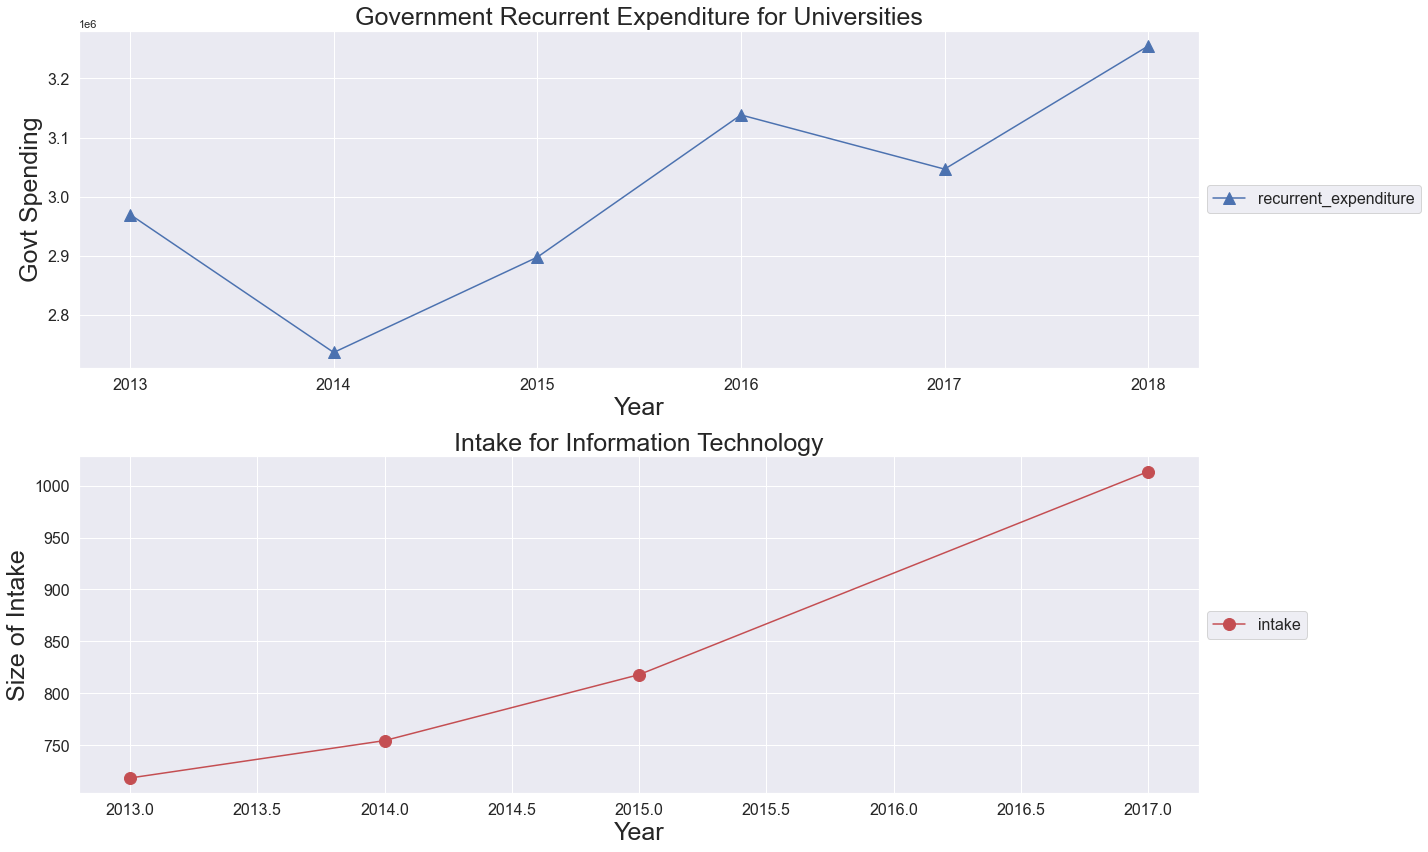

In [31]:
fig = plt.figure(figsize=(8,16))

ax1 = fig.add_subplot(2,1,1)
govt_spending.plot(kind='line',x='year', y='recurrent_expenditure',ax=ax1,figsize=(16,8), marker = '^', markersize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Govt Spending',fontsize=25)
plt.title('Government Recurrent Expenditure for Universities',fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 16})

ax2 = fig.add_subplot(2,1,2) 
it_course_year_df.plot(kind='line',x='year',y='intake', ax=ax2,figsize=(20,12), color = 'r', marker = 'o', markersize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Size of Intake',fontsize=25)
plt.title('Intake for Information Technology',fontsize=25)
fig.tight_layout() 

True enough, we do see an increase intake for IT related courses as the Government expenditure increase. However, suggesting the that IT intake increased because more resources are diverted to these departments is merely one possible explanation for the trend that we observe. As we do not have information of how the fundings are distributed, we cannot make this assertion confidently. 

### Acknowledging Assumptions & Limitations

As we attempt to tackle the research topic at hand, we have to acknowledge certain assumptions that we took to reach our conclusions, and the limitations as a result. 

- Although course is a big factor in the seleciton of jobs, skills and abilities are important components that are not captured in the dataset. 


- As the dataset is an aggregation of similar courses/industries, there may be differences in what is considered in a certain course title.
    - This aggregation also does not consider inter-course/inter-industry differences.
    
    
- We are not allowed access for how government spending is distributed amongst various universities and how exactly these fundings are distributed to the various courses.


- Our observations are only at a limited range of dataset (about 6 years) and might not be sufficient to account for possible flunctuations.

Nonetheless, our findings gives us a broad sensing of whether such detailed investigations are indeed worth pursuing.  

### Conclusion

By reviewing the available data, our group seeked to answer the question of whether Singapore's university education is meeting the demands of the manpower needs. From our review of the available dataset we can conclude: 

<b>(A)</b> We observe that the sector of <b>'IT and Other information services'</b> have a high and rising manpower need base on the rising vacancy rate compared to the other industries

<b>(B)</b> This corresponds with the employment rates of courses in universities that relate to this sector.

<b>(C)</b> However, although there is a rising intake in such courses, we cannot conclude if this is an immediate translation as a result of the increase in government funding for universities. 

Thus, the trends of employment rates for courses are consistent with the trends of industries with rising manpower demands but with the present data, we are unable to conclude if there is an intentional effort to keep up with the demands. 

With that said, our preliminary investigation proves promising, and should more data be available it would be worth pursuing. Having an understanding of how manpower needs are being met by local university would allow 1) students to make better informed decisions on courses to take, 2) institutes to  identify areas to enhance. 